# TBS

## preparing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hddm
import numpy as np
import pickle
from patsy import dmatrices, dmatrix, demo_data

/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
data = hddm.load_csv('exp2_DDM.csv')
data.at[data['step_att'].isin(['4']),'step_att']=2
data.at[data['step_att'].isin(['5']),'step_att']=1
data = hddm.utils.flip_errors(data)

In [3]:
D_L=data.loc[data['turn_type'].isin(['Left cTBS','Sham'])]
D_L_C=D_L.loc[D_L['task_type']=='Cons']
D_L_C_N=D_L_C.loc[D_L_C['snr_type']=='Noise']
D_L_C_N_UNAMB=D_L_C_N.loc[D_L_C_N['step_att'].isin([1])]
D_L_C_N_HALFAMB=D_L_C_N.loc[D_L_C_N['step_att'].isin([2])]
D_L_C_N_AMB=D_L_C_N.loc[D_L_C_N['step_att'].isin([3])]

## Unambiguous

In [4]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_N_UNAMB_m = hddm.HDDMRegressor(D_L_C_N_UNAMB, reg_descr, include='z')
D_L_C_N_UNAMB_m.find_starting_values()
D_L_C_N_UNAMB_m.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]


/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 4231.8 sec

## Halfambiguous

In [5]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_N_HALFAMB_m = hddm.HDDMRegressor(D_L_C_N_HALFAMB, reg_descr, include='z')
D_L_C_N_HALFAMB_m.find_starting_values()
D_L_C_N_HALFAMB_m.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4164.6 sec

## Ambiguous

In [6]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_N_AMB_m = hddm.HDDMRegressor(D_L_C_N_AMB, reg_descr, include='z')
D_L_C_N_AMB_m.find_starting_values()
D_L_C_N_AMB_m.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4136.7 sec

## Plotting

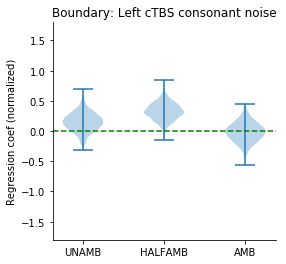

('P(a_UNAMB > Sham) = ', 0.8358585858585859)
('P(a_HALFAMB > Sham) = ', 0.9878787878787879)
('P(a_AMB > Sham) = ', 0.46565656565656566)


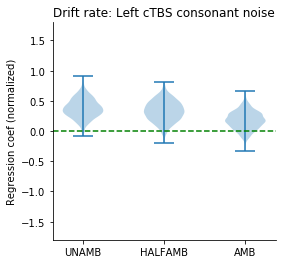

('P(v_UNAMB > Sham) = ', 0.98989898989899)
('P(v_HALFAMB > Sham) = ', 0.9717171717171718)
('P(v_AMB > Sham) = ', 0.8777777777777778)


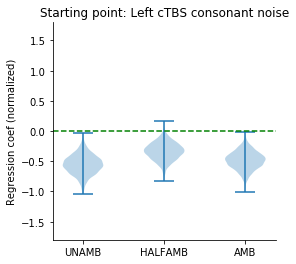

('P(z_UNAMB > Sham) = ', 0.0)
('P(z_HALFAMB > Sham) = ', 0.007575757575757576)
('P(z_AMB > Sham) = ', 0.0)


In [7]:
a_Intercept_UNAMB,a_cTBS_UNAMB = D_L_C_N_UNAMB_m.nodes_db.loc[["a_Intercept","a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']

v_Intercept_UNAMB,v_cTBS_UNAMB = D_L_C_N_UNAMB_m.nodes_db.loc[["v_Intercept","v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']

z_Intercept_UNAMB,z_cTBS_UNAMB = D_L_C_N_UNAMB_m.nodes_db.loc[["z_Intercept","z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']

a_Intercept_HALFAMB,a_cTBS_HALFAMB = D_L_C_N_HALFAMB_m.nodes_db.loc[["a_Intercept","a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']

v_Intercept_HALFAMB,v_cTBS_HALFAMB = D_L_C_N_HALFAMB_m.nodes_db.loc[["v_Intercept","v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']

z_Intercept_HALFAMB,z_cTBS_HALFAMB = D_L_C_N_HALFAMB_m.nodes_db.loc[["z_Intercept","z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']

a_Intercept_AMB,a_cTBS_AMB = D_L_C_N_AMB_m.nodes_db.loc[["a_Intercept","a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']

v_Intercept_AMB,v_cTBS_AMB = D_L_C_N_AMB_m.nodes_db.loc[["v_Intercept","v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']

z_Intercept_AMB,z_cTBS_AMB = D_L_C_N_AMB_m.nodes_db.loc[["z_Intercept","z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"], 'node']


fig, ax = plt.subplots()
fig.set_size_inches(4,4)

para_tag=['UNAMB','HALFAMB','AMB']
counts = [a_cTBS_UNAMB.trace()/(max(a_cTBS_UNAMB.trace())-min(a_cTBS_UNAMB.trace())),a_cTBS_HALFAMB.trace()/(max(a_cTBS_HALFAMB.trace())-min(a_cTBS_HALFAMB.trace())),a_cTBS_AMB.trace()/(max(a_cTBS_AMB.trace())-min(a_cTBS_AMB.trace()))]

ax.axhline(y = 0, color ="green", linestyle ="--")
ax.violinplot(counts)
ax.set_xticks([1,2,3])
ax.set_xticklabels(para_tag)
ax.set_ylim([-1.8,1.8])
ax.set_title('Boundary: Left cTBS consonant noise')
ax.set_ylabel('Regression coef (normalized)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

print("P(a_UNAMB > Sham) = ", (a_cTBS_UNAMB.trace() > 0).mean())
print("P(a_HALFAMB > Sham) = ", (a_cTBS_HALFAMB.trace() > 0).mean())
print("P(a_AMB > Sham) = ", (a_cTBS_AMB.trace() > 0).mean())

fig, ax = plt.subplots()
fig.set_size_inches(4,4)

para_tag=['UNAMB','HALFAMB','AMB']
counts = [v_cTBS_UNAMB.trace()/(max(v_cTBS_UNAMB.trace())-min(v_cTBS_UNAMB.trace())),v_cTBS_HALFAMB.trace()/(max(v_cTBS_HALFAMB.trace())-min(v_cTBS_HALFAMB.trace())),v_cTBS_AMB.trace()/(max(v_cTBS_AMB.trace())-min(v_cTBS_AMB.trace()))]

ax.axhline(y = 0, color ="green", linestyle ="--")
ax.violinplot(counts)
ax.set_xticks([1,2,3])
ax.set_xticklabels(para_tag)
ax.set_ylim([-1.8,1.8])
ax.set_title('Drift rate: Left cTBS consonant noise')
ax.set_ylabel('Regression coef (normalized)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

print("P(v_UNAMB > Sham) = ", (v_cTBS_UNAMB.trace() > 0).mean())
print("P(v_HALFAMB > Sham) = ", (v_cTBS_HALFAMB.trace() > 0).mean())
print("P(v_AMB > Sham) = ", (v_cTBS_AMB.trace() > 0).mean())

fig, ax = plt.subplots()
fig.set_size_inches(4,4)

para_tag=['UNAMB','HALFAMB','AMB']
counts = [z_cTBS_UNAMB.trace()/(max(z_cTBS_UNAMB.trace())-min(z_cTBS_UNAMB.trace())),z_cTBS_HALFAMB.trace()/(max(z_cTBS_HALFAMB.trace())-min(z_cTBS_HALFAMB.trace())),z_cTBS_AMB.trace()/(max(z_cTBS_AMB.trace())-min(z_cTBS_AMB.trace()))]

ax.axhline(y = 0, color ="green", linestyle ="--")
ax.violinplot(counts)
ax.set_xticks([1,2,3])
ax.set_xticklabels(para_tag)
ax.set_ylim([-1.8,1.8])
ax.set_title('Starting point: Left cTBS consonant noise')
ax.set_ylabel('Regression coef (normalized)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

print("P(z_UNAMB > Sham) = ", (z_cTBS_UNAMB.trace() > 0).mean())
print("P(z_HALFAMB > Sham) = ", (z_cTBS_HALFAMB.trace() > 0).mean())
print("P(z_AMB > Sham) = ", (z_cTBS_AMB.trace() > 0).mean())